In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [115]:
data = pd.read_csv('/Users/kaakxixi/Documents/data/vip_lose2.csv')
data.head()

,最近一次渠道,最近一次就餐方式,最近一次时段,店铺,商圈类型,城市类型,新既分类,区域名称,公司名称,业态,...,近90天活跃天数,近90天偏好时段,近90天偏好渠道,近90天偏好就餐方式,最近一次消费品类,近90天消费品类,最近一次消费商品,近90天消费商品,member_id,retent
0,app,外送,午餐,金运路餐厅,社区商业K&A,特一类,既有不足年,沪浙地区,上海,德克士,...,4,午餐,app,外送,炸鸡,炸鸡,脆皮手枪腿,咖喱鸡腿饭*,1100513286,1
1,微信小程序,外送,午餐,湖州首创餐厅,社区商业K&A,二类,既有足年,沪浙地区,杭州,德克士,...,7,下午茶,微信小程序,堂食,炸鸡,炸鸡,脆皮手枪腿,香辣鸡翅,1100935905,1
2,app,堂食,早餐,创富餐厅,社区商业,一类,新开,华南地区,福州,德克士,...,8,晚餐,app,堂食,,炸鸡,享脆油条早餐,咔滋脆皮鸡腿,1101046484,1
3,pos,堂食,午餐,常发餐厅,城市商业购物中心,二类,新既,沪浙地区,上海,德克士,...,1,午餐,pos,堂食,炸鸡,炸鸡,咔滋脆皮手枪腿,咔滋脆皮手枪腿,1101074150,1
4,微信小程序,堂食,下午茶,康虹升二,住商办,特一类,既有足年,沪浙地区,沪浙苏康师傅事业部,牛肉面,...,7,下午茶,大屏点餐,堂食,主餐,主餐,至尊红烧面,百事可乐(中),1101101108,1


In [14]:
data.describe()

,近90天消费金额,近90天tc,近90天活跃天数,member_id,retent
count,50972.000000,50972.000000,50972.000000,5.097200e+04,50972.000000
mean,671.963201,12.529114,6.806541,1.191819e+09,0.834772
std,3537.552223,66.747728,10.289679,5.192197e+08,0.371390
min,0.100000,1.000000,1.000000,1.100188e+09,0.000000
25%,145.700000,3.000000,2.000000,1.122672e+09,1.000000
50%,213.500000,5.000000,4.000000,1.152962e+09,1.000000
75%,354.265000,9.000000,7.000000,1.197685e+09,1.000000
max,197583.330000,7928.000000,90.000000,9.317807e+09,1.000000


In [118]:
data.dtypes

最近一次渠道                object
最近一次就餐方式              object
最近一次时段                object
店铺                    object
商圈类型                  object
城市类型                  object
新既分类                  object
区域名称                  object
公司名称                  object
业态                    object
经营类型                  object
近90天消费分段              object
近90天平均每次消费分段          object
近90天tc分段              object
近90天活跃天数分段            object
近90天消费金额             float64
近90天tc                 int64
近90天活跃天数               int64
近90天偏好时段              object
近90天偏好渠道              object
近90天偏好就餐方式            object
最近一次消费品类              object
近90天消费品类              object
最近一次消费商品              object
近90天消费商品              object
member_id              int64
retent                 int64
dtype: object

In [8]:
data.近90天tc.value_counts()

2      7671
3      6841
4      5751
5      4545
1      4145
       ... 
660       1
522       1
824       1
294       1
798       1
Name: 近90天tc, Length: 440, dtype: int64

In [117]:
data.isnull().sum()

最近一次渠道               0
最近一次就餐方式             0
最近一次时段               0
店铺                   0
商圈类型                 0
城市类型                 0
新既分类                 0
区域名称                 0
公司名称                 0
业态                   0
经营类型                 0
近90天消费分段             0
近90天平均每次消费分段         0
近90天tc分段             0
近90天活跃天数分段           0
近90天消费金额             0
近90天tc               0
近90天活跃天数             0
近90天偏好时段             0
近90天偏好渠道             0
近90天偏好就餐方式           0
最近一次消费品类             0
近90天消费品类             0
最近一次消费商品             0
近90天消费商品             0
member_id            0
retent               0
dtype: int64

In [120]:
data.近90天消费品类[data.近90天消费品类.str.strip()==''] = '其他'
data.近90天消费商品[data.近90天消费商品.str.strip()==''] = '其他'
data.最近一次消费品类[data.最近一次消费品类.str.strip()==''] = '其他'
data.最近一次消费商品[data.最近一次消费商品.str.strip()==''] = '其他'
data.head()

<ipython-input-120-e01143f457c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.近90天消费品类[data.近90天消费品类.str.strip()==''] = '其他'
<ipython-input-120-e01143f457c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.近90天消费商品[data.近90天消费商品.str.strip()==''] = '其他'
<ipython-input-120-e01143f457c8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.最近一次消费品类[data.最近一次消费品类.str.strip()==''] = '其他'
<ipython-input-120-e01143f457c8>:4: S

,最近一次渠道,最近一次就餐方式,最近一次时段,店铺,商圈类型,城市类型,新既分类,区域名称,公司名称,业态,...,近90天活跃天数,近90天偏好时段,近90天偏好渠道,近90天偏好就餐方式,最近一次消费品类,近90天消费品类,最近一次消费商品,近90天消费商品,member_id,retent
0,app,外送,午餐,金运路餐厅,社区商业K&A,特一类,既有不足年,沪浙地区,上海,德克士,...,4,午餐,app,外送,炸鸡,炸鸡,脆皮手枪腿,咖喱鸡腿饭*,1100513286,1
1,微信小程序,外送,午餐,湖州首创餐厅,社区商业K&A,二类,既有足年,沪浙地区,杭州,德克士,...,7,下午茶,微信小程序,堂食,炸鸡,炸鸡,脆皮手枪腿,香辣鸡翅,1100935905,1
2,app,堂食,早餐,创富餐厅,社区商业,一类,新开,华南地区,福州,德克士,...,8,晚餐,app,堂食,其他,炸鸡,享脆油条早餐,咔滋脆皮鸡腿,1101046484,1
3,pos,堂食,午餐,常发餐厅,城市商业购物中心,二类,新既,沪浙地区,上海,德克士,...,1,午餐,pos,堂食,炸鸡,炸鸡,咔滋脆皮手枪腿,咔滋脆皮手枪腿,1101074150,1
4,微信小程序,堂食,下午茶,康虹升二,住商办,特一类,既有足年,沪浙地区,沪浙苏康师傅事业部,牛肉面,...,7,下午茶,大屏点餐,堂食,主餐,主餐,至尊红烧面,百事可乐(中),1101101108,1


In [119]:
data.rename(columns = lambda x: x.strip(), inplace=True)
data.columns

Index(['最近一次渠道', '最近一次就餐方式', '最近一次时段', '店铺', '商圈类型', '城市类型', '新既分类', '区域名称',
       '公司名称', '业态', '经营类型', '近90天消费分段', '近90天平均每次消费分段', '近90天tc分段',
       '近90天活跃天数分段', '近90天消费金额', '近90天tc', '近90天活跃天数', '近90天偏好时段', '近90天偏好渠道',
       '近90天偏好就餐方式', '最近一次消费品类', '近90天消费品类', '最近一次消费商品', '近90天消费商品',
       'member_id', 'retent'],
      dtype='object')

In [29]:
data.近90天消费品类[data.近90天消费品类.str.strip()==''] = '其他'
data.近90天消费商品[data.近90天消费商品.str.strip()==''] = '其他'
data.最近一次消费品类[data.最近一次消费品类.str.strip()==''] = '其他'
data.最近一次消费商品[data.最近一次消费商品.str.strip()==''] = '其他'
data.head()

<ipython-input-29-e01143f457c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.近90天消费品类[data.近90天消费品类.str.strip()==''] = '其他'
<ipython-input-29-e01143f457c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.近90天消费商品[data.近90天消费商品.str.strip()==''] = '其他'
<ipython-input-29-e01143f457c8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.最近一次消费品类[data.最近一次消费品类.str.strip()==''] = '其他'
<ipython-input-29-e01143f457c8>:4: Setti

,最近一次渠道,最近一次就餐方式,最近一次时段,店铺,商圈类型,城市类型,新既分类,区域名称,公司名称,业态,...,近90天活跃天数,近90天偏好时段,近90天偏好渠道,近90天偏好就餐方式,最近一次消费品类,近90天消费品类,最近一次消费商品,近90天消费商品,member_id,retent
0,app,外送,午餐,金运路餐厅,社区商业K&A,特一类,既有不足年,沪浙地区,上海,德克士,...,4,午餐,app,外送,炸鸡,炸鸡,脆皮手枪腿,咖喱鸡腿饭*,1100513286,1
1,微信小程序,外送,午餐,湖州首创餐厅,社区商业K&A,二类,既有足年,沪浙地区,杭州,德克士,...,7,下午茶,微信小程序,堂食,炸鸡,炸鸡,脆皮手枪腿,香辣鸡翅,1100935905,1
2,app,堂食,早餐,创富餐厅,社区商业,一类,新开,华南地区,福州,德克士,...,8,晚餐,app,堂食,其他,炸鸡,享脆油条早餐,咔滋脆皮鸡腿,1101046484,1
3,pos,堂食,午餐,常发餐厅,城市商业购物中心,二类,新既,沪浙地区,上海,德克士,...,1,午餐,pos,堂食,炸鸡,炸鸡,咔滋脆皮手枪腿,咔滋脆皮手枪腿,1101074150,1
4,微信小程序,堂食,下午茶,康虹升二,住商办,特一类,既有足年,沪浙地区,沪浙苏康师傅事业部,牛肉面,...,7,下午茶,大屏点餐,堂食,主餐,主餐,至尊红烧面,百事可乐(中),1101101108,1


In [30]:
data.近90天消费品类.value_counts()

卡           19165
主餐          17515
炸鸡          11843
饮料            727
副餐            667
其他            405
早餐            346
甜品            243
加价礼品           26
食品             11
免费赠品           11
外送费             7
预包装             5
其他              1
Name: 近90天消费品类, dtype: int64

In [121]:
cate_column = ['最近一次渠道', '最近一次就餐方式', '最近一次时段',  '商圈类型', '城市类型', '新既分类', '区域名称',
       '公司名称', '业态', '经营类型', '近90天消费分段', '近90天平均每次消费分段', '近90天tc分段',
       '近90天活跃天数分段', '近90天偏好时段', '近90天偏好渠道',
       '近90天偏好就餐方式', '最近一次消费品类', '近90天消费品类', '最近一次消费商品', '近90天消费商品']
for i in data[cate_column].columns:
    print(f'{i}:')
    print(data[i].agg(['value_counts']).T)
    print('='*80)

最近一次渠道:
              pos     app     微信小程序   大屏点餐    美团      饿了么     支付宝小程序
value_counts   29367    9757    7097    2973    1231     489      58
最近一次就餐方式:
              堂食        外带        外送      
value_counts     37164      8781      5027
最近一次时段:
              晚餐      下午茶     午餐      早餐      夜宵      其他    
value_counts   22927   13749    9631    2972    1658      35
商圈类型:
              城市商业街     社区商业      城市商业购物中心  社区商业K&A   交通枢纽      景区        \
value_counts     24661     11375      6695      5856      1189       389   

              封闭通路                办公区       住商办       K&A       
value_counts       304       278       118        91        16  
城市类型:
               二类     四类     一类    三类    特一类 
value_counts  16136  13899  11105  8831  1001
新既分类:
              既有不足年  既有足年   新既     新开   
value_counts  33746  10101   4876   2249
区域名称:
              陕蒙地区    湘鄂豫地区   东蒙地区    云贵地区    川渝地区    兰州独立公司  山西独立公司  京津冀地区   \
value_counts    7881    6324    5962    5861    5764    4362    339

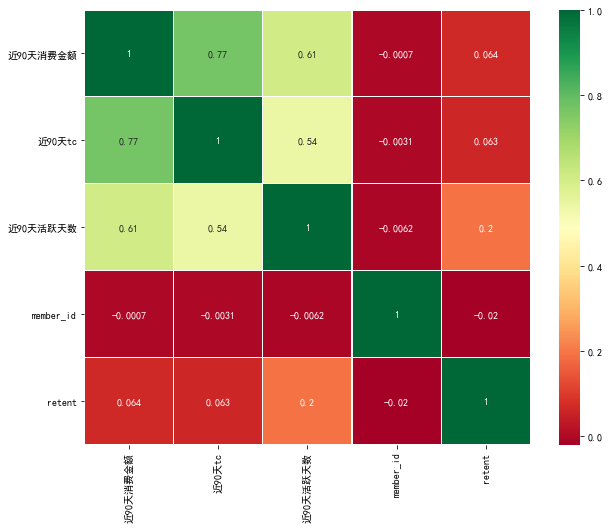

In [33]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [122]:
member = data.member_id
data['lose'] = 1 - data['retent']
data.head()

,最近一次渠道,最近一次就餐方式,最近一次时段,店铺,商圈类型,城市类型,新既分类,区域名称,公司名称,业态,...,近90天偏好时段,近90天偏好渠道,近90天偏好就餐方式,最近一次消费品类,近90天消费品类,最近一次消费商品,近90天消费商品,member_id,retent,lose
0,app,外送,午餐,金运路餐厅,社区商业K&A,特一类,既有不足年,沪浙地区,上海,德克士,...,午餐,app,外送,炸鸡,炸鸡,脆皮手枪腿,咖喱鸡腿饭*,1100513286,1,0
1,微信小程序,外送,午餐,湖州首创餐厅,社区商业K&A,二类,既有足年,沪浙地区,杭州,德克士,...,下午茶,微信小程序,堂食,炸鸡,炸鸡,脆皮手枪腿,香辣鸡翅,1100935905,1,0
2,app,堂食,早餐,创富餐厅,社区商业,一类,新开,华南地区,福州,德克士,...,晚餐,app,堂食,其他,炸鸡,享脆油条早餐,咔滋脆皮鸡腿,1101046484,1,0
3,pos,堂食,午餐,常发餐厅,城市商业购物中心,二类,新既,沪浙地区,上海,德克士,...,午餐,pos,堂食,炸鸡,炸鸡,咔滋脆皮手枪腿,咔滋脆皮手枪腿,1101074150,1,0
4,微信小程序,堂食,下午茶,康虹升二,住商办,特一类,既有足年,沪浙地区,沪浙苏康师傅事业部,牛肉面,...,下午茶,大屏点餐,堂食,主餐,主餐,至尊红烧面,百事可乐(中),1101101108,1,0


In [39]:
del_data = data[['member_id','店铺']]
del_data.head()

,member_id,店铺
0,1100513286,金运路餐厅
1,1100935905,湖州首创餐厅
2,1101046484,创富餐厅
3,1101074150,常发餐厅
4,1101101108,康虹升二


In [123]:
data.drop(['member_id','店铺','retent'],axis=1,inplace=True)
data.head()

,最近一次渠道,最近一次就餐方式,最近一次时段,商圈类型,城市类型,新既分类,区域名称,公司名称,业态,经营类型,...,近90天tc,近90天活跃天数,近90天偏好时段,近90天偏好渠道,近90天偏好就餐方式,最近一次消费品类,近90天消费品类,最近一次消费商品,近90天消费商品,lose
0,app,外送,午餐,社区商业K&A,特一类,既有不足年,沪浙地区,上海,德克士,加盟,...,5,4,午餐,app,外送,炸鸡,炸鸡,脆皮手枪腿,咖喱鸡腿饭*,0
1,微信小程序,外送,午餐,社区商业K&A,二类,既有足年,沪浙地区,杭州,德克士,加盟,...,11,7,下午茶,微信小程序,堂食,炸鸡,炸鸡,脆皮手枪腿,香辣鸡翅,0
2,app,堂食,早餐,社区商业,一类,新开,华南地区,福州,德克士,加盟,...,10,8,晚餐,app,堂食,其他,炸鸡,享脆油条早餐,咔滋脆皮鸡腿,0
3,pos,堂食,午餐,城市商业购物中心,二类,新既,沪浙地区,上海,德克士,加盟,...,1,1,午餐,pos,堂食,炸鸡,炸鸡,咔滋脆皮手枪腿,咔滋脆皮手枪腿,0
4,微信小程序,堂食,下午茶,住商办,特一类,既有足年,沪浙地区,沪浙苏康师傅事业部,牛肉面,直营,...,8,7,下午茶,大屏点餐,堂食,主餐,主餐,至尊红烧面,百事可乐(中),0


In [124]:
data.columns

Index(['最近一次渠道', '最近一次就餐方式', '最近一次时段', '商圈类型', '城市类型', '新既分类', '区域名称', '公司名称',
       '业态', '经营类型', '近90天消费分段', '近90天平均每次消费分段', '近90天tc分段', '近90天活跃天数分段',
       '近90天消费金额', '近90天tc', '近90天活跃天数', '近90天偏好时段', '近90天偏好渠道', '近90天偏好就餐方式',
       '最近一次消费品类', '近90天消费品类', '最近一次消费商品', '近90天消费商品', 'lose'],
      dtype='object')

In [125]:
## 处理分类变量
dummy_cols = ['最近一次渠道','最近一次就餐方式','最近一次时段','商圈类型','区域名称','业态','经营类型',
              '近90天偏好时段', '近90天偏好渠道', '近90天偏好就餐方式',
               '最近一次消费品类', '近90天消费品类']
data = pd.get_dummies(data,columns=dummy_cols)

data['城市类型'] = data['城市类型'].map(lambda s:0 if s.strip()=='特一类' else 1 if s.strip()=='一类' else 2 if s.strip()=='二类' else 3 if s.strip()=='三类' else 4)
data['新既分类'] = data['新既分类'].map(lambda s:0 if s.strip()=='新开' else 1 if s.strip()=='新既' else 2 if s.strip()=='既有不足年' else 3)
data['近90天消费分段'] = data['近90天消费分段'].map(lambda s:s.strip()).replace(['0-50元','51-100元','100-150元','151-200元','201-500元','500+元'],[0,1,2,3,4,5])
data['近90天平均每次消费分段'] = data['近90天平均每次消费分段'].map(lambda s:s.strip()).replace(['0-20元','21-40元','41-60元','61-80元','81-100元','100+元'],[0,1,2,3,4,5])
data['近90天tc分段'] = data['近90天tc分段'].map(lambda s:s.strip()).replace(['1次','2-4次','5-7次','8-10次','10+次'],[0,1,2,3,4])
data['近90天活跃天数分段'] = data['近90天活跃天数分段'].map(lambda s:s.strip()).replace(['1天','2-4天','5-7天','8-10天','10+天'],[0,1,2,3,4])

data.columns


Index(['城市类型', '新既分类', '公司名称', '近90天消费分段', '近90天平均每次消费分段', '近90天tc分段',
       '近90天活跃天数分段', '近90天消费金额', '近90天tc', '近90天活跃天数',
       ...
       '近90天消费品类_副餐      ', '近90天消费品类_加价礼品    ', '近90天消费品类_卡       ',
       '近90天消费品类_外送费     ', '近90天消费品类_早餐      ', '近90天消费品类_炸鸡      ',
       '近90天消费品类_甜品      ', '近90天消费品类_预包装     ', '近90天消费品类_食品      ',
       '近90天消费品类_饮料      '],
      dtype='object', length=102)

In [134]:
data.dtypes

城市类型                  int64
新既分类                  int64
公司名称                 object
近90天消费分段              int64
近90天平均每次消费分段          int64
                      ...  
近90天消费品类_炸鸡           uint8
近90天消费品类_甜品           uint8
近90天消费品类_预包装          uint8
近90天消费品类_食品           uint8
近90天消费品类_饮料           uint8
Length: 102, dtype: object

In [135]:
# 删除不要的列
data.drop(['公司名称','最近一次消费商品','近90天消费商品'],axis=1,inplace=True)

In [126]:
data.head()
                                                                            

,城市类型,新既分类,公司名称,近90天消费分段,近90天平均每次消费分段,近90天tc分段,近90天活跃天数分段,近90天消费金额,近90天tc,近90天活跃天数,...,近90天消费品类_副餐,近90天消费品类_加价礼品,近90天消费品类_卡,近90天消费品类_外送费,近90天消费品类_早餐,近90天消费品类_炸鸡,近90天消费品类_甜品,近90天消费品类_预包装,近90天消费品类_食品,近90天消费品类_饮料
0,0,2,上海,2,1,2,1,131.90,5,4,...,0,0,0,0,0,1,0,0,0,0
1,2,3,杭州,4,1,4,2,238.55,11,7,...,0,0,0,0,0,1,0,0,0,0
2,1,0,福州,4,1,3,3,340.29,10,8,...,0,0,0,0,0,1,0,0,0,0
3,2,1,上海,1,3,0,0,63.50,1,1,...,0,0,0,0,0,1,0,0,0,0
4,0,3,沪浙苏康师傅事业部,4,1,3,2,216.02,8,7,...,0,0,0,0,0,0,0,0,0,0


In [113]:
data['近90天消费分段'].value_counts()

4    20048
3    10128
5     7316
2     6199
1     4242
0     3039
Name: 近90天消费分段, dtype: int64

In [127]:
##data['新既分类'] = data['新既分类'].map(lambda s:0 if s.strip()=='新开' else 1 if s.strip()=='新既' else 2 if s.strip()=='既有不足年' else 3)
data[['城市类型', '新既分类','近90天消费分段','近90天平均每次消费分段','近90天tc分段','近90天活跃天数分段']].head()

,城市类型,新既分类,近90天消费分段,近90天平均每次消费分段,近90天tc分段,近90天活跃天数分段
0,0,2,2,1,2,1
1,2,3,4,1,4,2
2,1,0,4,1,3,3
3,2,1,1,3,0,0
4,0,3,4,1,3,2


In [128]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix

In [136]:
X = data.drop(['lose'],axis=1)
y = data['lose']
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.2,random_state=0)

In [137]:
print("train_x shape: ",train_X.shape)
print("train_y shape: ",train_y.shape)
print("test_x shape: ",test_X.shape)
print("test_y shape: ",test_y.shape)

train_x shape:  (40777, 98)
train_y shape:  (40777,)
test_x shape:  (10195, 98)
test_y shape:  (10195,)


In [ ]:
# model
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_y))


In [140]:
model = LogisticRegression()
model.fit(train_X,train_y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_y))
print('The AUC of the Logistic Regression is',metrics.roc_auc_score(prediction3,test_y))

The accuracy of the Logistic Regression is 0.8420794507111329


/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [235]:
from sklearn.model_selection import GridSearchCV
penalty=['elasticnet','l1','l2']
C=[0.1,0.5,1,2,10]
hyper={'C':C,'penalty':penalty}
gd=GridSearchCV(estimator=LogisticRegression(random_state=0),param_grid=hyper,verbose=True,scoring='roc_auc')
gd.fit(X,y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/

/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

0.7884213171623388
LogisticRegression(C=0.1, random_state=0)


/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [228]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_y))
print('The auc of the Decision Tree is',metrics.roc_auc_score(prediction4,test_y))

The accuracy of the Decision Tree is 0.7632172633643943
The auc of the Decision Tree is 0.5754612770162959


In [234]:
from sklearn.model_selection import GridSearchCV
max_depth=[10,50,100,200]
min_samples_leaf=[10,20,50,100]
hyper={'max_depth':max_depth,'min_samples_leaf':min_samples_leaf}
gd=GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),param_grid=hyper,verbose=True,scoring='roc_auc')
gd.fit(X,y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
0.7792659780268284
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, random_state=0)


In [229]:
model=GaussianNB()
model.fit(train_X,train_y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_y))
print('The auc of the Decision Tree is',metrics.roc_auc_score(prediction6,test_y))

The accuracy of the NaiveBayes is 0.5082883766552232
The auc of the Decision Tree is 0.6039113516507133


In [230]:
model=KNeighborsClassifier() 
model.fit(train_X,train_y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_y))
print('The auc of the KNN is',metrics.roc_auc_score(prediction5,test_y))

The accuracy of the KNN is 0.817165277096616
The auc of the KNN is 0.6197044052679836


<ipython-input-231-cef3179afbcb>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=pd.Series()


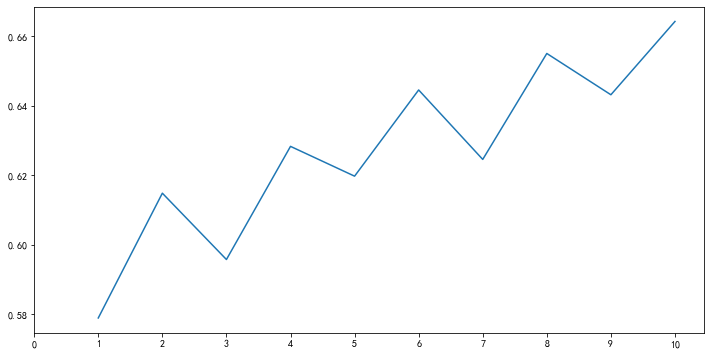

AUCs for different values of n are: [0.57892459 0.61480872 0.59573517 0.62827274 0.61970441 0.64449167
 0.62452347 0.65498609 0.64311314 0.66418949] with the max value as  0.6641894859209506


In [231]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.roc_auc_score(prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('AUCs for different values of n are:',a.values,'with the max value as ',a.values.max())

In [232]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_y))
print('The AUC of the Random Forests is',metrics.roc_auc_score(prediction7,test_y))

The accuracy of the Random Forests is 0.8344286414909269
The AUC of the Random Forests is 0.6664272637210782


In [233]:
from sklearn.model_selection import GridSearchCV
n_estimators=[10,50,100,200,500,1000]
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True,scoring='roc_auc')
gd.fit(X,y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
0.7670639870302909
RandomForestClassifier(n_estimators=1000, random_state=0)


In [236]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              
                                              ('RFor',RandomForestClassifier(n_estimators=1000,random_state=0)),
                                              ('LR',LogisticRegression(C=0.1)),
                                              ('DT',DecisionTreeClassifier(random_state=0,max_depth=10, min_samples_leaf=100)),
                                              ('NB',GaussianNB())
                                              
                                             ], 
                       voting='soft').fit(train_X,train_y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_y))
cross=cross_val_score(ensemble_lin_rbf,X,y, cv = 5,scoring = "roc_auc")
print('The cross validated score is',cross.mean())

/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuracy for ensembled model is: 0.8284453163315351


/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

The cross validated score is 0.7853436506673699


In [237]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              
                                              ('RFor',RandomForestClassifier(n_estimators=1000,random_state=0)),
                                              ('LR',LogisticRegression(C=0.1)),
                                              ('DT',DecisionTreeClassifier(random_state=0,max_depth=10, min_samples_leaf=100))
                                              
                                              
                                             ], 
                       voting='soft').fit(train_X,train_y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_y))
cross=cross_val_score(ensemble_lin_rbf,X,y, cv = 5,scoring = "roc_auc")
print('The cross validated score is',cross.mean())

/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuracy for ensembled model is: 0.8417851888180481


/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

The cross validated score is 0.7857709745305195


In [238]:
# Bagged DecisionTree
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The auc for bagged Decision Tree is:',metrics.roc_auc_score(prediction,test_y))
result=cross_val_score(model,X,y,cv=5,scoring='roc_auc')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The auc for bagged Decision Tree is: 0.668397519328222
The cross validated score for bagged Decision Tree is: 0.7531718005277689


In [240]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
#ada.fit(train_X,train_y)
#prediction=ada.predict(test_y)
#print('The accuracy for AdaBoost is:',metrics.accuracy_score(prediction,test_y))
result=cross_val_score(ada,X,y,cv=5,scoring='roc_auc')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.7890856358903819


In [ ]:
#Hyper-Parameter Tuning for AdaBoost
n_estimators=[100,500,1000]
learn_rate=[0.01,0.05,0.1,0.5,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True,cv=3,scoring='roc_auc')
gd.fit(X,y)
print(gd.best_score_)
print(gd.best_estimator_)

In [241]:
#Stochastic Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,y,cv=5,scoring='roc_auc')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.7918563317125613


In [249]:
#Hyper-Parameter Tuning for SGB
n_estimators=[100,500,1000]
learn_rate=[0.01,0.05,0.1,0.5,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True,cv=3,scoring='roc_auc')
gd.fit(X,y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
0.7894303408999743
AdaBoostClassifier(learning_rate=0.05, n_estimators=1000)


In [242]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=100,learning_rate=0.1,eval_metric=['logloss','auc','error'])
result=cross_val_score(xgboost,X,y,cv=5,scoring='roc_auc')
print('The cross validated score for XGBoost is:',result.mean())

/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:33:33] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:33:41] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:33:49] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:33:56] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:34:04] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The cross validated score for XGBoost is: 0.7933060793080172


In [248]:
#Hyper-Parameter Tuning for XGB
n_estimators=[50,100,500,1000]
learn_rate=[0.01,0.1,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=xg.XGBClassifier(eval_metric=['logloss','auc','error']),param_grid=hyper,verbose=True,cv=3,scoring='roc_auc')
gd.fit(X,y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/xgboos

/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/xgboos

/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7924565808311587
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1,
              eval_metric=['logloss', 'auc', 'error'], gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [244]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(n_estimators=100,learning_rate=0.1)
result=cross_val_score(lgb_model,X,y,cv=5,scoring='roc_auc')
print('The cross validated score for LightGBM is:',result.mean())

The cross validated score for LightGBM is: 0.7927917722163917


In [247]:
#Hyper-Parameter Tuning for LightGBM
n_estimators=[50,100,500,1000]
learn_rate=[0.01,0.1,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=lgb.LGBMClassifier(),param_grid=hyper,verbose=True,cv=3,scoring='roc_auc')
gd.fit(X,y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
0.7930863203296571
LGBMClassifier(learning_rate=0.01, n_estimators=500)


In [252]:
y.value_counts()

0    42550
1     8422
Name: lose, dtype: int64

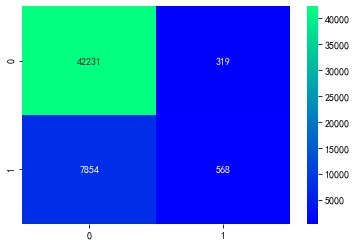

In [168]:
ada=AdaBoostClassifier(n_estimators=1000,random_state=0,learning_rate=0.1)
result=cross_val_predict(ada,X,y,cv=10)
sns.heatmap(confusion_matrix(y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

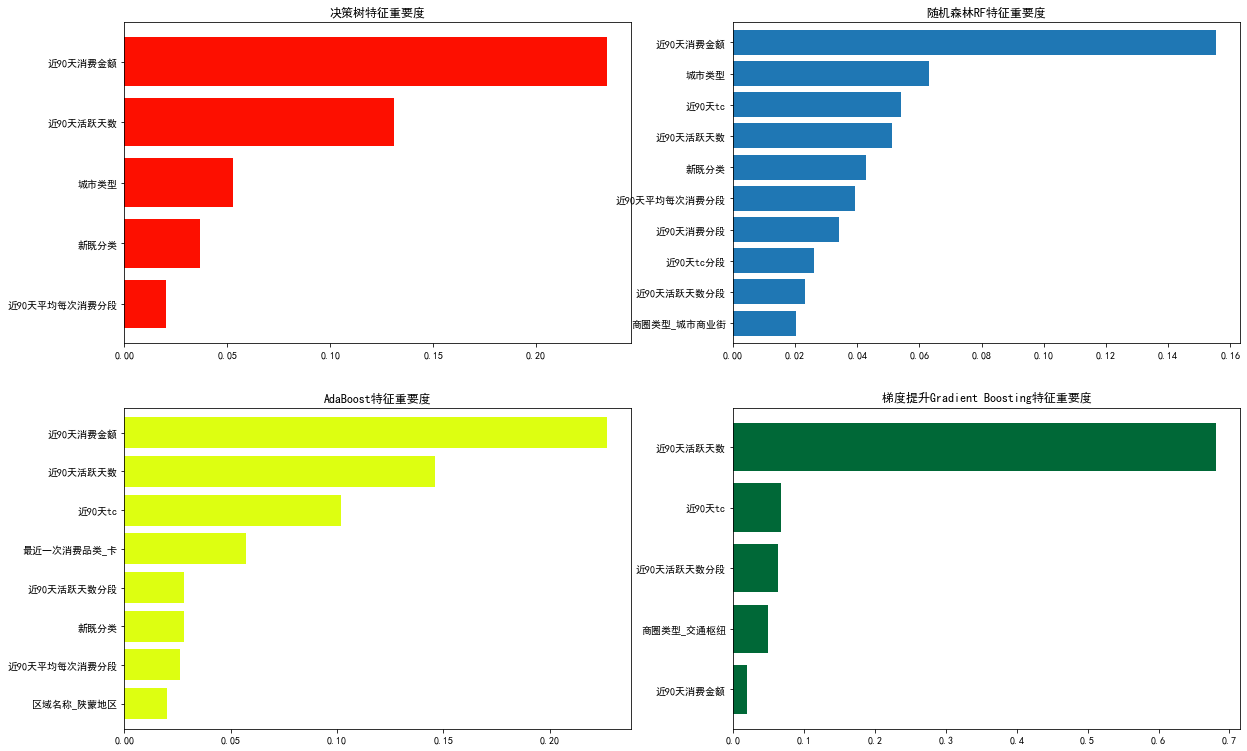

In [173]:
f,ax=plt.subplots(2,2,figsize=(20,13))
model=DecisionTreeClassifier(max_depth=100, random_state=0)
model.fit(X,y)
#A = pd.Series(model.coef_[0],X.columns.str.strip())
A = pd.Series(model.feature_importances_,X.columns.str.strip())
A[A>=0.02].sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0],color='#FD0F00')
ax[0,0].set_title('决策树特征重要度')
model=RandomForestClassifier(n_estimators=100,random_state=0)
model.fit(X,y)
A = pd.Series(model.feature_importances_,X.columns.str.strip())
A[A>=0.02].sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1])
ax[0,1].set_title('随机森林RF特征重要度')
model=AdaBoostClassifier(n_estimators=1000,learning_rate=0.1,random_state=0)
model.fit(X,y)
A=pd.Series(model.feature_importances_,X.columns.str.strip())
A[A>=0.02].sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],color='#ddff11')
ax[1,0].set_title('AdaBoost特征重要度')
model=GradientBoostingClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,y)
A = pd.Series(model.feature_importances_,X.columns.str.strip())
A[A>=0.02].sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],cmap='RdYlGn_r')
ax[1,1].set_title('梯度提升Gradient Boosting特征重要度')
plt.show()

In [254]:
A.sort_values(ascending=True)

业态_德克士           0.000000
最近一次时段_早餐        0.000000
近90天消费品类_免费赠品    0.000000
商圈类型_住商办         0.000000
商圈类型_办公区         0.000000
                   ...   
近90天消费金额         0.020018
商圈类型_交通枢纽        0.048754
近90天活跃天数分段       0.063488
近90天tc           0.068415
近90天活跃天数         0.681073
Length: 98, dtype: float64

In [251]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
kfold = KFold(n_splits=5) # k=5, split the data into 5 equal parts
xyz=[]
accuracy=[]
std=[]
acc=[]
pr=[]
rec=[]
f=[]
au=[]
classifiers=['Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest','Voting Classifier',
             'Bagging DecisionTree','AdaBoost','Gradient Boosting','XGBoost','LightGBM']
models=[LogisticRegression(C=0.1),
        KNeighborsClassifier(n_neighbors=10),
        DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, random_state=0),
        GaussianNB(),
        RandomForestClassifier(n_estimators=1000),
        VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              
                                              ('RFor',RandomForestClassifier(n_estimators=1000,random_state=0)),
                                              ('LR',LogisticRegression(C=0.1)),
                                              ('DT',DecisionTreeClassifier(random_state=0,max_depth=10, min_samples_leaf=100))
                                              
                                              
                                             ], 
                       voting='soft'),
       BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100),
       AdaBoostClassifier(learning_rate=0.05, n_estimators=1000,random_state=0),
       GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1),
       xg.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1,
              eval_metric=['logloss', 'auc', 'error'], gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, n_estimators=500),
        lgb.LGBMClassifier(learning_rate=0.01, n_estimators=500)
       ]
for i in models:
    model = i
    accuracy = cross_val_score(model,X,y, cv = kfold,scoring = "accuracy")
    precision = cross_val_score(model,X,y, cv = kfold,scoring = "precision")
    recall = cross_val_score(model,X,y, cv = kfold,scoring = "recall")
    f1 = cross_val_score(model,X,y, cv = kfold,scoring = "f1")
    auc = cross_val_score(model,X,y, cv = kfold,scoring = "roc_auc")
    acc.append(accuracy.mean())
    pr.append(precision.mean())
    rec.append(recall.mean())
    f.append(f1.mean())
    au.append(auc.mean())
    std.append(auc.std())
new_models=pd.DataFrame({'accuracy':acc,'precision':pr,'recall':rec,'f1':f,'auc':au,'std':std},index=classifiers)       
new_models

/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/xgboos

,accuracy,precision,recall,f1,auc,std
Logistic Regression,0.838735,0.622761,0.061722,0.112277,0.787872,0.003097
KNN,0.832378,0.469054,0.111926,0.180609,0.724230,0.005266
Decision Tree,0.838382,0.564753,0.099342,0.168389,0.779396,0.003942
Naive Bayes,0.508416,0.241412,0.922648,0.382670,0.757780,0.004253
Random Forest,0.833811,0.487505,0.175532,0.258269,0.766972,0.004610
Voting Classifier,0.838499,0.563428,0.101420,0.171750,0.785685,0.003325
Bagging DecisionTree,0.833261,0.488334,0.197886,0.281587,0.753284,0.004895
AdaBoost,0.839853,0.675412,0.059299,0.108960,0.789906,0.002321
Gradient Boosting,0.839853,0.577670,0.113082,0.189022,0.791007,0.003972
XGBoost,0.841128,0.698542,0.067551,0.123142,0.793789,0.002902


In [ ]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(LogisticRegression(C=5),X,y,cv=5)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('逻辑回归混淆矩阵')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=10),X,y,cv=5)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('KNN混淆矩阵')

y_pred = cross_val_predict(DecisionTreeClassifier(max_depth=100),X,y,cv=5)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('决策树混淆矩阵')

y_pred = cross_val_predict(GaussianNB(),X,y,cv=5)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('朴素贝叶斯混淆矩阵')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,y,cv=5)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('随机森林RF混淆矩阵')

y_pred = cross_val_predict(VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RFor',RandomForestClassifier(n_estimators=100,random_state=0)),
                                              ('LR',LogisticRegression(C=5)),
                                              ('DT',DecisionTreeClassifier(random_state=0,max_depth=100))
                                             ], 
                       voting='soft'),X,y,cv=5)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('投票分类混淆矩阵')


y_pred = cross_val_predict(BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
                           ,X,y,cv=5)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Bagging分类混淆矩阵')

y_pred = cross_val_predict(AdaBoostClassifier(n_estimators=1000,learning_rate=0.1,random_state=0),X,y,cv=5)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[2,1],annot=True,fmt='2.0f')
ax[2,1].set_title('AdaBoost混淆矩阵')

y_pred = cross_val_predict(GradientBoostingClassifier(n_estimators=200,learning_rate=0.05,random_state=0),X,y,cv=5)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[2,2],annot=True,fmt='2.0f')
ax[2,2].set_title('梯度Boost混淆矩阵')

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

In [207]:
classifiers

['Logistic Regression',
 'KNN',
 'Decision Tree',
 'Naive Bayes',
 'Random Forest',
 'Voting Classifier',
 'Bagging DecisionTree',
 'AdaBoost',
 'Gradient Boosting']

In [202]:
new_models_dataframe3.index

Index(['Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes',
       'Random Forest', 'Voting Classifier', 'Bagging DecisionTree',
       'AdaBoost', 'Gradient Boosting'],
      dtype='object')

In [198]:
box.columns

MultiIndex([( 'Logistic Regression',),
            (                 'KNN',),
            (       'Decision Tree',),
            (       'Random Forest',),
            (   'Voting Classifier',),
            ('Bagging DecisionTree',),
            (            'AdaBoost',),
            (   'Gradient Boosting',)],
           )

/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, '')

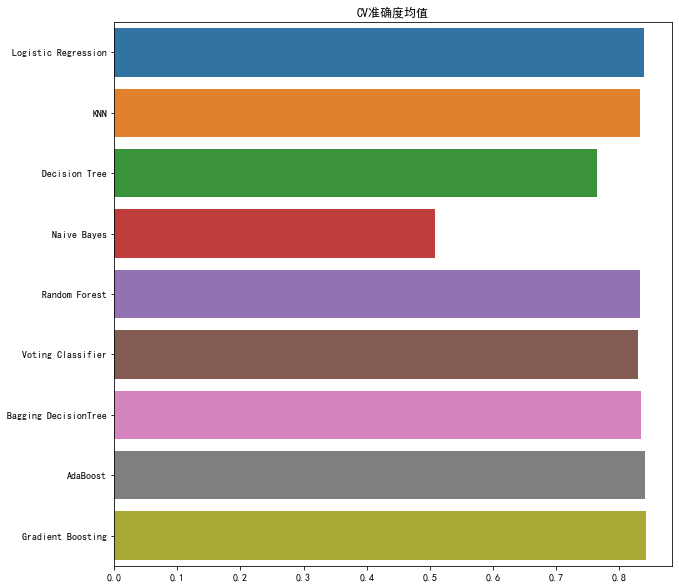

In [211]:
plt.figure(figsize=(10,10))
sns.barplot(new_models_dataframe3['CV Mean'],y=new_models_dataframe3.index)
plt.title('CV准确度均值')
plt.xlabel('')

/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

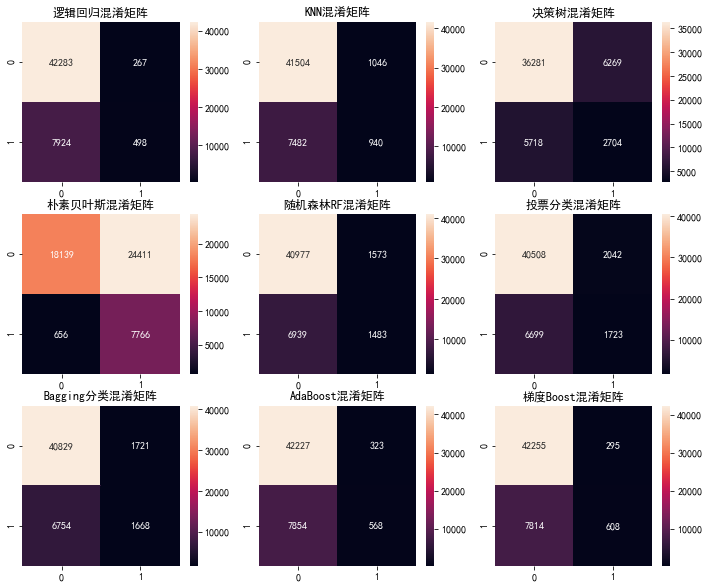

In [212]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(LogisticRegression(C=5),X,y,cv=5)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('逻辑回归混淆矩阵')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=10),X,y,cv=5)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('KNN混淆矩阵')

y_pred = cross_val_predict(DecisionTreeClassifier(max_depth=100),X,y,cv=5)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('决策树混淆矩阵')

y_pred = cross_val_predict(GaussianNB(),X,y,cv=5)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('朴素贝叶斯混淆矩阵')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,y,cv=5)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('随机森林RF混淆矩阵')

y_pred = cross_val_predict(VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RFor',RandomForestClassifier(n_estimators=100,random_state=0)),
                                              ('LR',LogisticRegression(C=5)),
                                              ('DT',DecisionTreeClassifier(random_state=0,max_depth=100))
                                             ], 
                       voting='soft'),X,y,cv=5)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('投票分类混淆矩阵')


y_pred = cross_val_predict(BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
                           ,X,y,cv=5)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Bagging分类混淆矩阵')

y_pred = cross_val_predict(AdaBoostClassifier(n_estimators=1000,learning_rate=0.1,random_state=0),X,y,cv=5)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[2,1],annot=True,fmt='2.0f')
ax[2,1].set_title('AdaBoost混淆矩阵')

y_pred = cross_val_predict(GradientBoostingClassifier(n_estimators=200,learning_rate=0.05,random_state=0),X,y,cv=5)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[2,2],annot=True,fmt='2.0f')
ax[2,2].set_title('梯度Boost混淆矩阵')

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

In [180]:
new_models_dataframe3['CV Mean']

Logistic Regression     0.838558
KNN                     0.832378
Decision Tree           0.764675
Naive Bayes             0.508416
Random Forest           0.833124
Voting Classifier       0.829671
Bagging DecisionTree    0.833261
AdaBoost                0.839716
Gradient Boosting       0.841168
Name: CV Mean, dtype: float64

In [ ]:
#Hyper-Parameter Tuning for GradientBoosting
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,y)
print(gd.best_score_)
print(gd.best_estimator_)

In [63]:
data['城市类型'].map(lambda s:0 if s.strip()=='特一类' else 1 if s.strip()=='一类' else 2 if s.strip()=='二类' else 3 if s.strip()=='三类' else 4).value_counts()

2    16136
4    13899
1    11105
3     8831
0     1001
Name: 城市类型, dtype: int64

In [76]:
data['近90天活跃天数分段'].value_counts()

2-4天          21098
5-7天           9877
1天             8567
10+天           7153
8-10天          4277
Name: 近90天活跃天数分段, dtype: int64

In [77]:
data['近90天活跃天数分段'].replace(['1天','2-4天','5-7天','8-10天','10+天'],[0,1,2,3,4]).value_counts()

2-4天          21098
5-7天           9877
1天             8567
10+天           7153
8-10天          4277
Name: 近90天活跃天数分段, dtype: int64

In [48]:
## tree model

from sklearn.model_selection import train_test_split
X = data.iloc[:,:-1]
y = data['lose']
train_x_tree,test_x_tree,train_y_tree,test_y_tree = train_test_split(X,y,test_size=0.2,random_state=0)

In [47]:
data.iloc[:,:-1].head()

,最近一次渠道,最近一次就餐方式,最近一次时段,商圈类型,城市类型,新既分类,区域名称,公司名称,业态,经营类型,...,近90天消费金额,近90天tc,近90天活跃天数,近90天偏好时段,近90天偏好渠道,近90天偏好就餐方式,最近一次消费品类,近90天消费品类,最近一次消费商品,近90天消费商品
0,app,外送,午餐,社区商业K&A,特一类,既有不足年,沪浙地区,上海,德克士,加盟,...,131.90,5,4,午餐,app,外送,炸鸡,炸鸡,脆皮手枪腿,咖喱鸡腿饭*
1,微信小程序,外送,午餐,社区商业K&A,二类,既有足年,沪浙地区,杭州,德克士,加盟,...,238.55,11,7,下午茶,微信小程序,堂食,炸鸡,炸鸡,脆皮手枪腿,香辣鸡翅
2,app,堂食,早餐,社区商业,一类,新开,华南地区,福州,德克士,加盟,...,340.29,10,8,晚餐,app,堂食,其他,炸鸡,享脆油条早餐,咔滋脆皮鸡腿
3,pos,堂食,午餐,城市商业购物中心,二类,新既,沪浙地区,上海,德克士,加盟,...,63.50,1,1,午餐,pos,堂食,炸鸡,炸鸡,咔滋脆皮手枪腿,咔滋脆皮手枪腿
4,微信小程序,堂食,下午茶,住商办,特一类,既有足年,沪浙地区,沪浙苏康师傅事业部,牛肉面,直营,...,216.02,8,7,下午茶,大屏点餐,堂食,主餐,主餐,至尊红烧面,百事可乐(中)


In [226]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pydotplus
from graphviz import sources
#from IPython.display import Image
#from six import StringIO
#from sklearn import tree

clf = DecisionTreeClassifier(max_depth=5)
clf.fit(train_X,train_y)
dot_data = export_graphviz(clf,out_file=None,filled=True, rounded=True,special_characters=True)
graph = sources.Source(dot_data)
graph.render("会员流失决策树")
graph

#tree.plot_tree(clf)
#plt.show()


#dot_data = StringIO()
#export_graphviz(tree,
#                          out_file=None,filled=True, rounded=True,
#                                special_characters=True)

#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#Image(graph.create_png())

ModuleNotFoundError: No module named 'graphviz'

In [50]:
pip install pydotplus

     |████████████████████████████████| 278 kB 196 kB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=34344b50b8e22f4be95670f0b235c70f8ba2cb44980af21408c312355cc54548
  Stored in directory: /Users/kaakxixi/Library/Caches/pip/wheels/fe/cd/78/a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [54]:
train_y_tree.head()

7837     0
13118    0
10840    0
17628    0
33113    0
Name: lose, dtype: int64